# EDA-5. Проектирование экспериментов
---

### 2. Введение в проектирование экспериментов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

* No_show — пациент не пришёл на приём;

* Gender — пол пациента;

* ScheduledDay — день, когда планируется встреча;

* AppointmentDay — реальная дата встречи;

* Age — возраст пациента;

* Neighbourhood — район проживания каждого пациента;

* Scholarship — получает ли пациент стипендию;

* …и несколько других признаков.

In [2]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


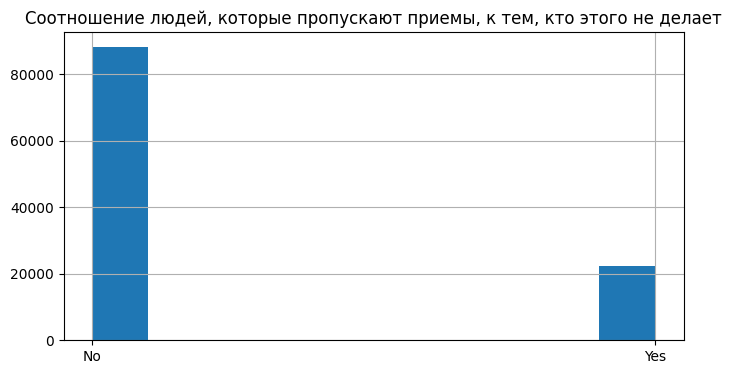

In [3]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [4]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

In [5]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

In [6]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

---
### 3. Логирование экспериментов

In [7]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [8]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from 'c:\\Users\\Blooodniy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\logging\\__init__.py'>

In [9]:
logging.basicConfig(level=logging.DEBUG)

In [10]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

In [11]:
logging.FileHandler('log_file.log')

<FileHandler c:\IDE\Skillfactory_DS\EDA\EDA-5. Проектирование экспериментов\log_file.log (NOTSET)>

УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

In [12]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2024-02-26 16:22:19,843: Check


In [13]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [14]:
!mkdir logs

In [15]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2024-02-26 16:28:46,099: Data
INFO: 2024-02-26 16:28:46,100: Data shape (110527, 14)
C:\Users\Blooodniy\AppData\Local\Temp\ipykernel_12896\2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2024-02-26 16:28:46,113: Percentage of women: 0.653882342398853
C:\Users\Blooodniy\AppData\Local\Temp\ipykernel_12896\2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO: 2024-02-26 16:28

In [16]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2024-02-26 16:32:35,913: Data shape is incorrect!


---
### 4. Знакомство с Comet.ml

In [ ]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="n6fj8SteyFi6yIAtl8kQaO5Lv",
    project_name="medical-appointment",
    workspace="blooodniy",
)

DEBUG: 2024-02-26 20:49:31,724: [Tracing] Create new propagation context: {'trace_id': 'bea14bbb16884722b4b0d22237ad5546', 'span_id': 'bb6a0958ca047f35', 'parent_span_id': None, 'dynamic_sampling_context': None}
DEBUG: 2024-02-26 20:49:35,045: No INI file found: []
DEBUG: 2024-02-26 20:49:35,046: No INI file found: ['./.comet.config']
DEBUG: 2024-02-26 20:49:35,046: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2024-02-26 20:49:35,047: No INI file found: ['~/.comet.config']
DEBUG: 2024-02-26 20:49:35,048: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2024-02-26 20:49:35,048: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2024-02-26 20:49:35,049: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2024-02-26 20:49:35,049: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2024-02-26 20:49:35,050: Found nothing--returning NO_VALUE
DEBUG: 2024-02-26 20:49:35,056: No INI file found: []
DEBUG: 2024

COMET WARNING: Failed to log system metrics: [sys.ram,sys.cpu,sys.load]
DEBUG: 2024-02-26 20:49:45,358: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2024-02-26 20:49:45,358: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/system-details HTTP/1.1" 200 55
DEBUG: 2024-02-26 20:49:45,772: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2024-02-26 20:49:46,003: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2024-02-26 20:49:46,806: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/parameter HTTP/1.1" 200 55
DEBUG: 2024-02-26 20:49:47,696: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2024-02-26 20:49:47,701: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2024-02-26 20:49:47,702: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2024-02-26 20